In [1]:
import sklearn
print(sklearn.__version__)


1.2.2


In [2]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

#from keras.utils.np_utils import to_categorical#convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split  


In [3]:
data=r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\BreaKHis 400X\train'

In [4]:
Images=[]
import os
for dirname,_,filenames in os.walk(data):
    for filename in filenames:
            file_name, file_extension = os.path.splitext(filename)
            if file_extension == '.db':
                continue
            img=os.path.join(dirname,filename)
            Images.append(img)

In [5]:
Images[:10]

['C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-001.png',
 'C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-002.png',
 'C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-003.png',
 'C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-004.png',
 'C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-005.png',
 'C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-006.png',
 'C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-007.png',
 'C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\train\\benign\\SOB_B_A-14-22549AB-400-008.png',
 'C:\\Users\\ST-0010\\Music\\CHANDRU\\Breast_Cancer\\BreaKHis 400X\\trai

In [6]:
len(Images)

1693

In [7]:
class_label=[]
for i in Images:
    j=i.split('\\')
    class_label.append(j[-2])

In [8]:
class_label[:10]

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign']

In [9]:
len(class_label)

1693

In [10]:
#shuffle two lists with same order
temp=list(zip(Images,class_label))
random.shuffle(temp)
Images,class_label=zip(*temp)
data=pd.DataFrame(list(zip(Images,class_label)),columns=['image_path','class_label'])

In [11]:
data.shape

(1693, 2)

In [12]:
data.head()

image_path class_label
0  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...      benign
1  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
2  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
3  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
4  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant

In [13]:
data.class_label.value_counts()

class_label
malignant    1146
benign        547
Name: count, dtype: int64

In [14]:
from sklearn.utils import resample
df_c0 = data[data['class_label']== 'malignant']
df_c1 = data[data['class_label']== 'benign']


In [15]:
#downsample the majority class
upsampled_df_c0=resample(df_c0,replace=False,random_state=23,n_samples=1000)
upsampled_df_c1=resample(df_c1,replace=True,random_state=23,n_samples=1000)


In [16]:
#Cobine both
df_upsampled=pd.concat([upsampled_df_c0,upsampled_df_c1])

In [17]:
df_upsampled.head()

image_path class_label
1268  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
1374  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
490   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
234   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
778   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant

In [18]:
df_upsampled.class_label.value_counts()

class_label
malignant    1000
benign       1000
Name: count, dtype: int64

In [19]:
df_upsampled.shape

(2000, 2)

In [20]:
data = df_upsampled.sample(frac=1)
data.shape

(2000, 2)

In [21]:
data[:10]

image_path class_label
760   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
1160  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
1567  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...      benign
968   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...      benign
300   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...      benign
291   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...      benign
869   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...   malignant
464   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...      benign
846   C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...      benign
1098  C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\B...      benign

Text(0.5, 0, 'Class_label')

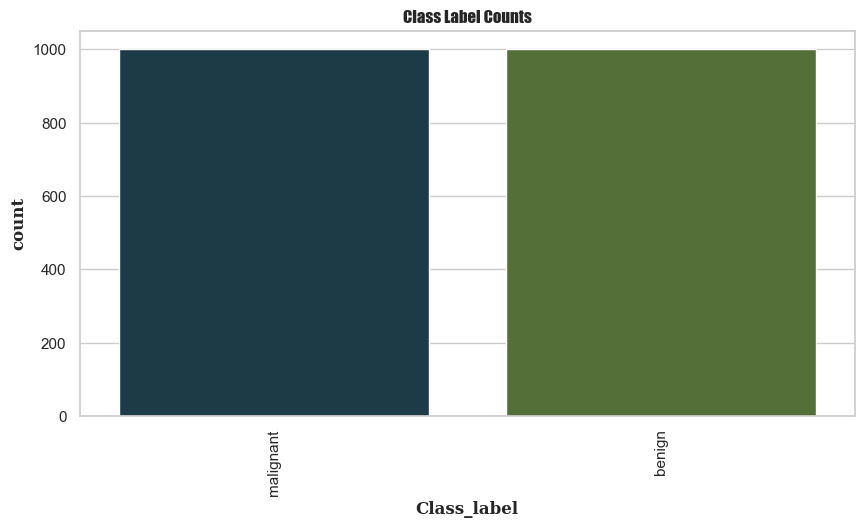

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [23]:
def resize_image(img_path):
    # Read the image
    file = cv2.imread(img_path) 
    # Resize the image
    resized = cv2.resize(file, (224, 224), interpolation=cv2.INTER_AREA)
    resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    resized = resized / 255
    resized= np.array(resized)
    # Reshape the resized image
    return resized

In [24]:
import cv2
images=[resize_image(img) for img in data['image_path']]

In [25]:
data['class_label'][:11]

760     malignant
1160    malignant
1567       benign
968        benign
300        benign
291        benign
869     malignant
464        benign
846        benign
1098       benign
863     malignant
1124    malignant
159        benign
757     malignant
210     malignant
Name: class_label, dtype: object

In [26]:
class_names = list(data['class_label'])

In [27]:
images[0].shape

(224, 224, 3)

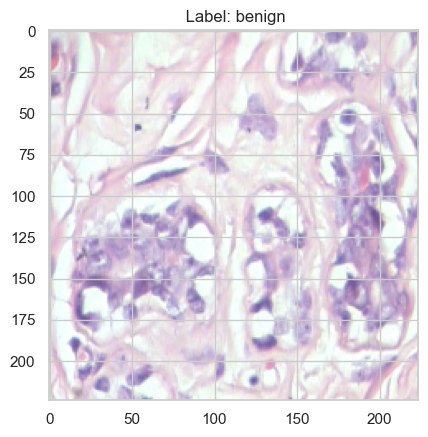

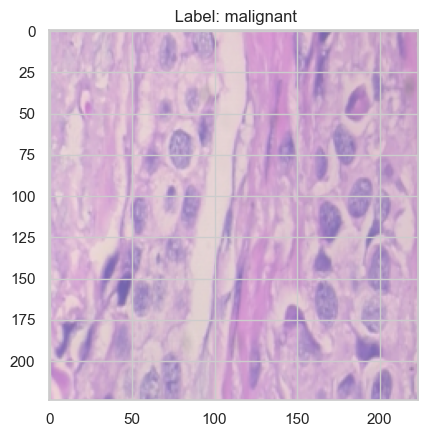

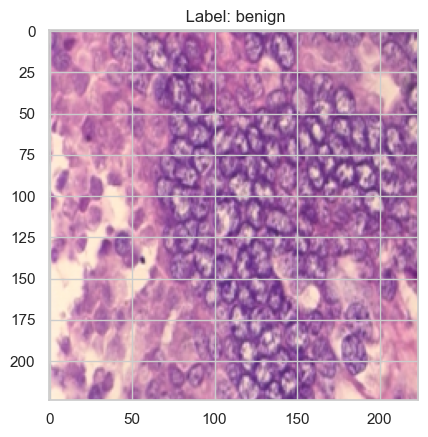

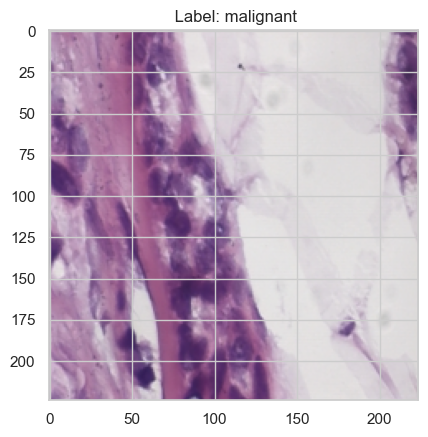

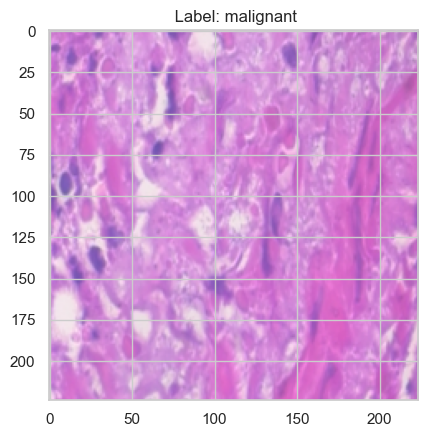

In [28]:
# Randomly choose 5 indices
random_indices = random.sample(range(len(images)), 5)

# Display 5 randomly chosen images with labels
for idx in random_indices:
    resized_img = images[idx]

    label = class_names[idx]  # Assuming label is stored in the 'label' column of your dataset
    plt.imshow(resized_img)
    plt.title(f" Label: {label}")
    #plt.axis('off')
    plt.show()

In [29]:
images = np.array(images)

In [30]:
images.shape

(2000, 224, 224, 3)

In [31]:
data['class_label']

760     malignant
1160    malignant
1567       benign
968        benign
300        benign
          ...    
1047    malignant
1486    malignant
988        benign
874     malignant
654        benign
Name: class_label, Length: 2000, dtype: object

In [32]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])

In [33]:
enc.classes_

array(['benign', 'malignant'], dtype='<U9')

In [37]:
y[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [39]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [40]:
y=np.array(y)

In [41]:
y.shape

(2000, 2)

In [42]:
y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [43]:
images.shape

(2000, 224, 224, 3)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=42)

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1400, 224, 224, 3), (1400, 2), (600, 224, 224, 3), (600, 2))

In [49]:
## Manual CNN

In [46]:
batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', batch_input_shape = (batch_size,224, 224, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dense(2, activation = "sigmoid"))
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                      

In [49]:
#Compile the model
opt = Adam(learning_rate=0.001)
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history= model.fit(X_train, y_train, epochs =5, validation_data = (X_test,y_test),batch_size =16)

Epoch 1/5
88/88 [==============================] - 201s 2s/step - loss: 0.6964 - accuracy: 0.5471 - val_loss: 0.6773 - val_accuracy: 0.7150
Epoch 2/5
88/88 [==============================] - 143s 2s/step - loss: 0.6548 - accuracy: 0.6643 - val_loss: 0.6414 - val_accuracy: 0.7517
Epoch 3/5
88/88 [==============================] - 143s 2s/step - loss: 0.6075 - accuracy: 0.7121 - val_loss: 0.6781 - val_accuracy: 0.6433
Epoch 4/5
88/88 [==============================] - 144s 2s/step - loss: 0.6074 - accuracy: 0.7164 - val_loss: 0.5627 - val_accuracy: 0.7583
Epoch 5/5
88/88 [==============================] - 142s 2s/step - loss: 0.5703 - accuracy: 0.7364 - val_loss: 1.0460 - val_accuracy: 0.5850


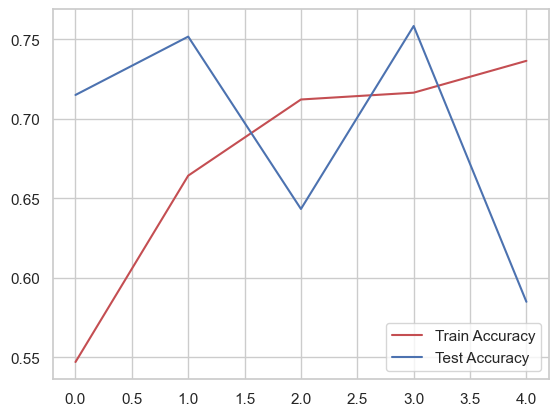

In [51]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

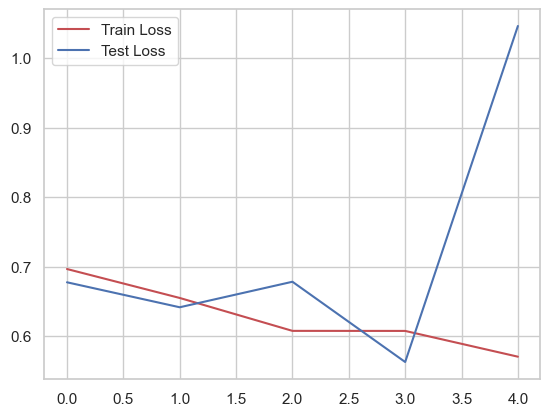

In [52]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [53]:
#print the test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.5849999785423279


19/19 [==============================] - 19s 565ms/step


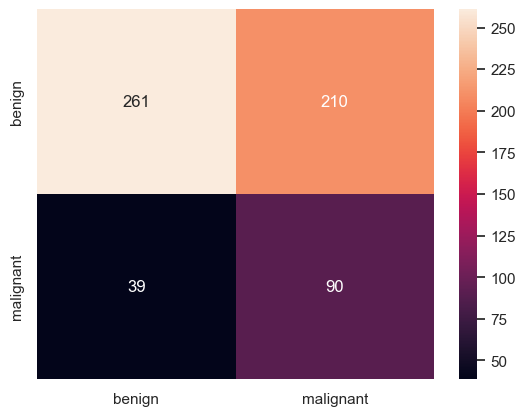

In [54]:
from sklearn.metrics import confusion_matrix
class_name = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax(model.predict(X_test), axis=1), np.argmax(y_test, axis=1)), columns = class_name, index=class_name)
heatmap = sns.heatmap(df_heatmap, annot = True, fmt = 'd')

In [55]:
score_1 = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy : ", score_1[1])

Test Accuracy :  0.5849999785423279


In [56]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['CNN', score_1[1]]
results.loc[0] = new

In [57]:
results

model  test_accuracy
0   CNN          0.585

In [58]:
from keras.applications.vgg16 import VGG16

In [59]:
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [60]:
vgg.trainable = False

In [64]:
# Set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dense_5 (Dense)             (None, 7, 7, 128)         65664     
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               802944    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [65]:
opt = Adam(learning_rate=0.001)
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model_1.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [66]:
his2= model_1.fit(X_train, y_train, epochs = 10, validation_data = (X_test,y_test),batch_size =64)
# his2 = model_1.fit(datagen.flow(X_train, y_train, batch_size=16), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
22/22 [==============================] - 283s 12s/step - loss: 1.0320 - accuracy: 0.4950 - val_loss: 0.6831 - val_accuracy: 0.5133
Epoch 2/10
22/22 [==============================] - 178s 8s/step - loss: 0.6742 - accuracy: 0.5743 - val_loss: 0.6573 - val_accuracy: 0.6067
Epoch 3/10
22/22 [==============================] - 192s 9s/step - loss: 0.6034 - accuracy: 0.7000 - val_loss: 0.5409 - val_accuracy: 0.7200
Epoch 4/10
22/22 [==============================] - 186s 9s/step - loss: 0.5035 - accuracy: 0.7671 - val_loss: 0.4800 - val_accuracy: 0.7783
Epoch 5/10
22/22 [==============================] - 189s 9s/step - loss: 0.3939 - accuracy: 0.8471 - val_loss: 0.4235 - val_accuracy: 0.7900
Epoch 6/10
22/22 [==============================] - 192s 9s/step - loss: 0.3363 - accuracy: 0.8636 - val_loss: 0.3399 - val_accuracy: 0.8550
Epoch 7/10
22/22 [==============================] - 194s 9s/step - loss: 0.2669 - accuracy: 0.9014 - val_loss: 0.3592 - val_accuracy: 0.8517
Epoch 8/10
2

19/19 [==============================] - 78s 3s/step


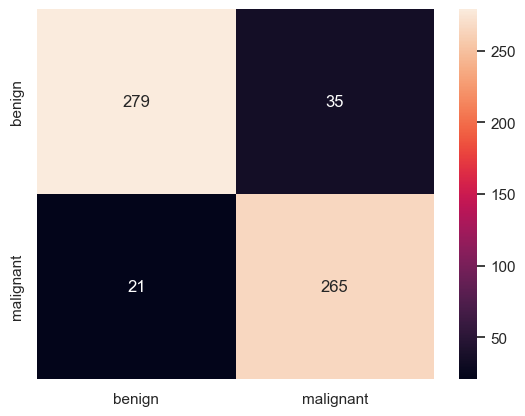

In [67]:
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_1.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [68]:
score_3 = model_1.evaluate(X_train, y_train, verbose=0)
print('train accuracy:', score_3[1])

train accuracy: 0.9828571677207947


In [69]:
score_4 = model_1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_4[1])

Test accuracy: 0.9066666960716248


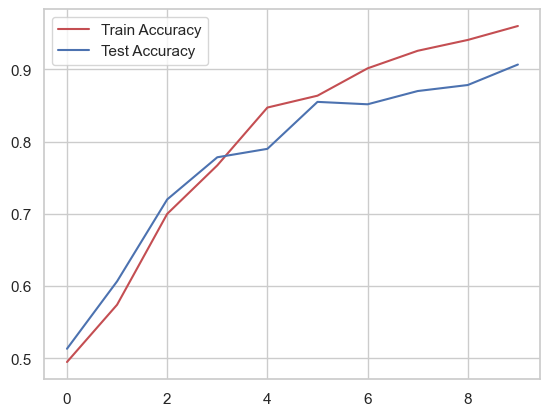

In [70]:
# plot the accuracy plot
plt.plot(his2.history['accuracy'], 'r')
plt.plot(his2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

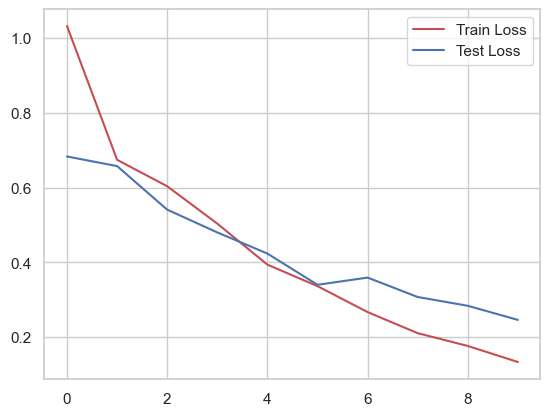

In [71]:
# plot the accuracy plot
plt.plot(his2.history['loss'], 'r')
plt.plot(his2.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [72]:
model_1.save(r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\VGG16_model_90.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 223ms/step


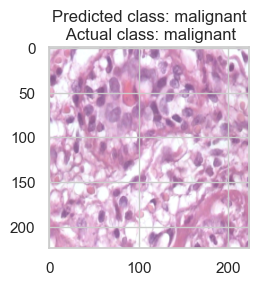

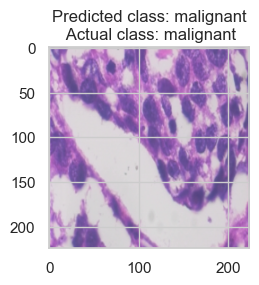

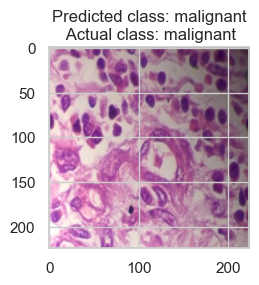

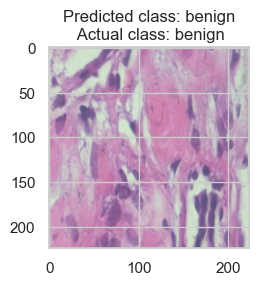

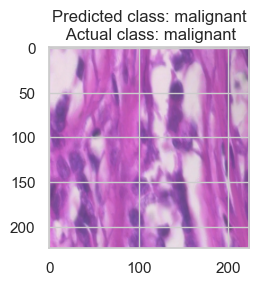

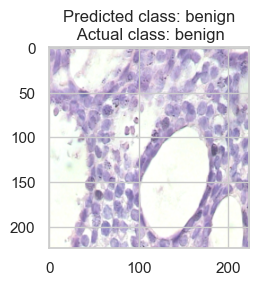

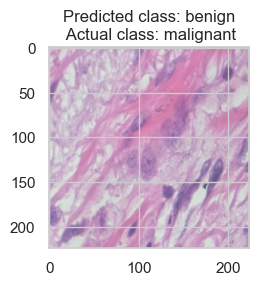

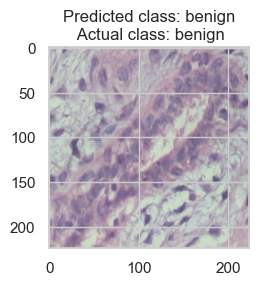

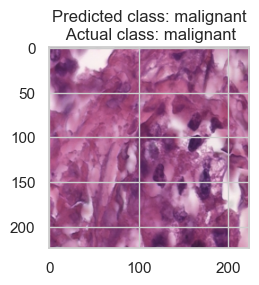

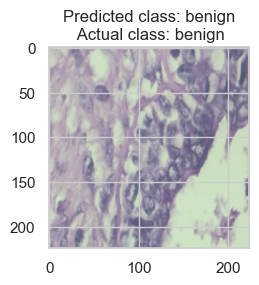

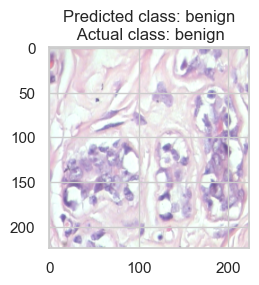

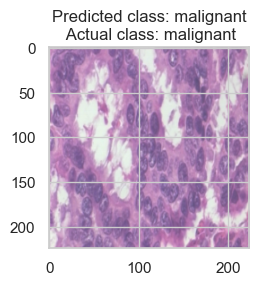

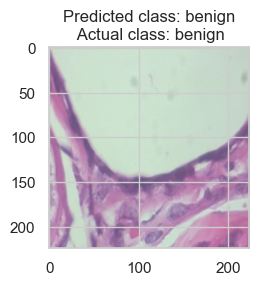

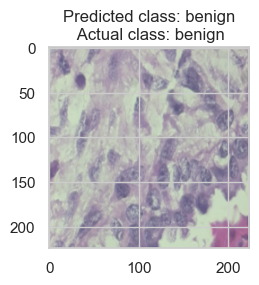

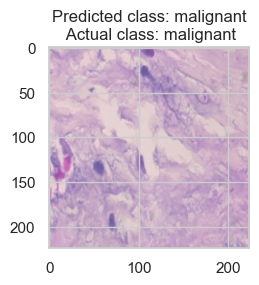

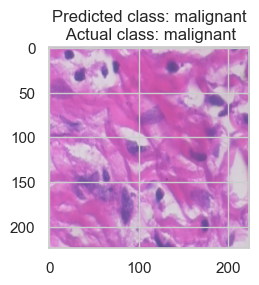

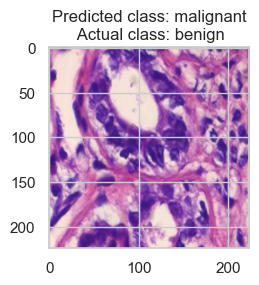

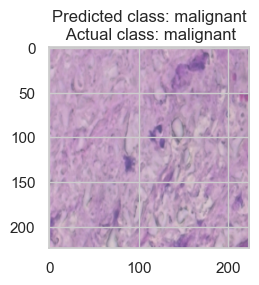

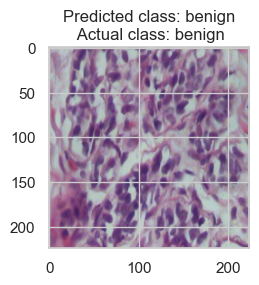

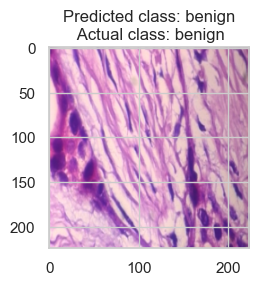

In [73]:
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = np.argmax(model_1.predict(np.array([X_test[i]]))[0])
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  plt.imshow(X_test[i])

In [67]:
# results = pd.DataFrame(columns=['model', 'test_accuracy'])
# new = ['CNN', score_1[0]]
# results.loc[0] = new

In [74]:
new = ['VGG', score_4[1]]
results.loc[1] = new

In [75]:
# results = pd.DataFrame(columns=['model', 'test_accuracy'])
# new = ['CNN', score_1[1]]
# results.loc[1] = new

In [76]:
results

model  test_accuracy
0   CNN       0.585000
1   VGG       0.906667

In [77]:
# import the vgg19 model
from keras.applications.vgg19 import VGG19

In [78]:
vgg1=VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [79]:
vgg1.trainable=False

In [81]:
# Set the vgg16 model
model_2=Sequential()
model_2.add(vgg1)
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(2, activation='softmax'))
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               3211392   
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 23236034 (88.64 MB)
Trainable params: 3211650 (12.25 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [82]:
#Compile the model
model_2.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ["accuracy"])

In [83]:
#Fit the data or train the model
History_2 = model_2.fit(X_train, y_train, epochs = 5, validation_data = (X_test,y_test),batch_size = 20)

Epoch 1/5
70/70 [==============================] - 374s 5s/step - loss: 0.7126 - accuracy: 0.6443 - val_loss: 0.5213 - val_accuracy: 0.7617
Epoch 2/5
70/70 [==============================] - 265s 4s/step - loss: 0.4616 - accuracy: 0.8221 - val_loss: 0.4125 - val_accuracy: 0.8433
Epoch 3/5
70/70 [==============================] - 288s 4s/step - loss: 0.3590 - accuracy: 0.8586 - val_loss: 0.4650 - val_accuracy: 0.8017
Epoch 4/5
70/70 [==============================] - 253s 4s/step - loss: 0.3144 - accuracy: 0.8750 - val_loss: 0.3537 - val_accuracy: 0.8767
Epoch 5/5
70/70 [==============================] - 249s 4s/step - loss: 0.2222 - accuracy: 0.9286 - val_loss: 0.3667 - val_accuracy: 0.8350


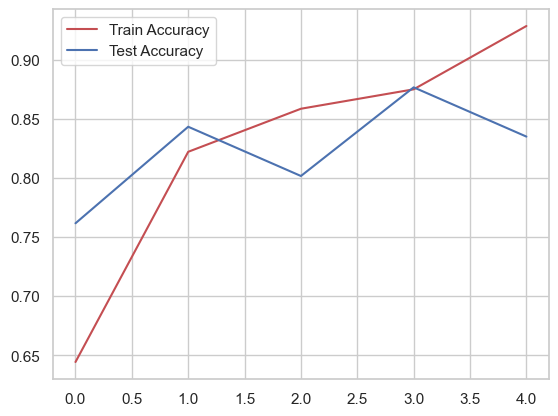

In [84]:
# plot the accuracy plot
plt.plot(History_2.history['accuracy'], 'r')
plt.plot(History_2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [85]:
# score_5 = model_2.evaluate(X_train, y_train, verbose=0)
# print('train accuracy:', score_5[1])

In [86]:
score_6 = model_2.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_6[1])

Test accuracy: 0.8349999785423279


19/19 [==============================] - 72s 4s/step


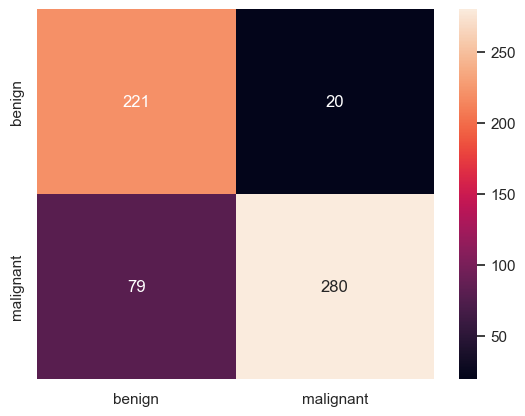

In [87]:
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_2.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [88]:
new = ['VGG19', score_6[1]]
results.loc[2] = new

In [89]:
results

model  test_accuracy
0    CNN       0.585000
1    VGG       0.906667
2  VGG19       0.835000

In [83]:
#model.save(r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\CNN_model.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
model_2.save(r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\VGG19_model_.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [91]:
from tensorflow.keras.applications import MobileNet

In [92]:
mob = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [93]:
mob.trainable=False

In [94]:
# Set the mobilenet model

model_mob=Sequential()
model_mob.add(mob)
model_mob.add(Flatten())
model_mob.add(Dense(128, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(64, activation='relu'))
model_mob.add(Dropout(0.2))
model_mob.add(Dense(2, activation='softmax'))

In [95]:
#Compile the model
opt = Adam(learning_rate=0.001)

optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.025)

model_mob.compile(optimizer = optimizer, loss = loss, metrics = ["accuracy"])

In [96]:
from keras.callbacks import ModelCheckpoint
filepath=r"C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\mob-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [97]:
#Fit the data or train the model
History_3 = model_mob.fit(X_train, y_train, epochs =10, validation_data = (X_test,y_test),batch_size = 64,callbacks=callbacks_list)

Epoch 1/10
22/22 [==============================] - ETA: 0s - loss: 4.7037 - accuracy: 0.6086
Epoch 1: val_accuracy improved from -inf to 0.74833, saving model to C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\mob-01-0.75.hdf5
22/22 [==============================] - 124s 4s/step - loss: 4.7037 - accuracy: 0.6086 - val_loss: 0.5258 - val_accuracy: 0.7483
Epoch 2/10
22/22 [==============================] - ETA: 0s - loss: 0.5958 - accuracy: 0.7650
Epoch 2: val_accuracy did not improve from 0.74833
22/22 [==============================] - 28s 1s/step - loss: 0.5958 - accuracy: 0.7650 - val_loss: 0.5561 - val_accuracy: 0.7300
Epoch 3/10
22/22 [==============================] - ETA: 0s - loss: 0.8208 - accuracy: 0.7386
Epoch 3: val_accuracy did not improve from 0.74833
22/22 [==============================] - 27s 1s/step - loss: 0.8208 - accuracy: 0.7386 - val_loss: 1.3313 - val_accuracy: 0.6517
Epoch 4/10
22/22 [==============================] - ETA: 0s - loss: 0.4222 - accuracy: 0.8564
Epo

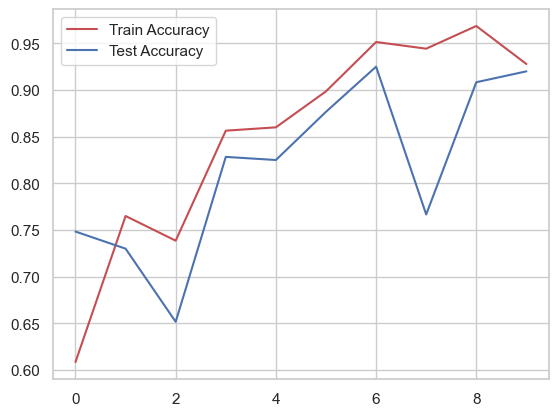

In [98]:
# plot the accuracy plot
plt.plot(History_3.history['accuracy'], 'r')
plt.plot(History_3.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [99]:
score_7 = model_mob.evaluate(X_test,y_test, verbose=0)
print('Test accuracy:', score_7[1])

Test accuracy: 0.9200000166893005


In [100]:
new = ['MobileNet', score_7[1]]
results.loc[3] = new

In [101]:
results

model  test_accuracy
0        CNN       0.585000
1        VGG       0.906667
2      VGG19       0.835000
3  MobileNet       0.920000

19/19 [==============================] - 9s 421ms/step


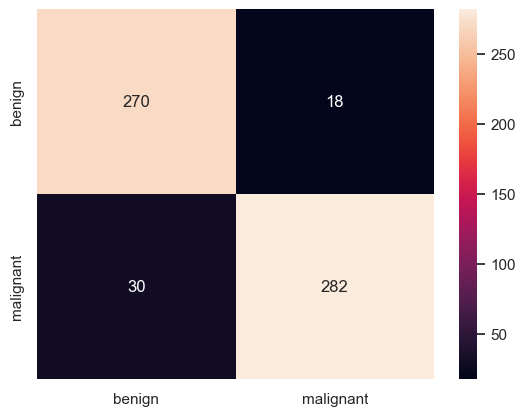

In [102]:
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_mob.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [103]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [107]:
inception =InceptionV3(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [108]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False
     

In [109]:

print("Building model with InceptionV3 with imagenet weights")
model_5 = Sequential([
    inception,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(rate=0.2),
    Dense(2, activation='softmax')
])


model_5.summary()

Building model with InceptionV3 with imagenet weights
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_6 (Flatten)         (None, 51200)             0         
                                                                 
 dense_17 (Dense)            (None, 512)               26214912  
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 48018722 (183.18 MB)
Trainable params: 26215938 (100.01 MB)
Non-trainable params: 21802784 (83.17 MB)
________________

In [110]:
# tell the model what cost and optimization method to use
model_5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [111]:
# # Use the Image Data Generator to import the images from the dataset
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# test_datagen = ImageDataGenerator(rescale = 1./255)

In [112]:
his5 = model_5.fit(X_train, y_train, epochs =5, validation_data = (X_test,y_test),batch_size = 64)

Epoch 1/5
22/22 [==============================] - 208s 7s/step - loss: 16.1068 - accuracy: 0.5800 - val_loss: 2.2420 - val_accuracy: 0.7250
Epoch 2/5
22/22 [==============================] - 49s 2s/step - loss: 1.2791 - accuracy: 0.7807 - val_loss: 0.6151 - val_accuracy: 0.7483
Epoch 3/5
22/22 [==============================] - 49s 2s/step - loss: 0.3264 - accuracy: 0.8571 - val_loss: 0.3800 - val_accuracy: 0.8350
Epoch 4/5
22/22 [==============================] - 49s 2s/step - loss: 0.1968 - accuracy: 0.9236 - val_loss: 0.3297 - val_accuracy: 0.8817
Epoch 5/5
22/22 [==============================] - 48s 2s/step - loss: 0.1417 - accuracy: 0.9557 - val_loss: 0.3066 - val_accuracy: 0.8733


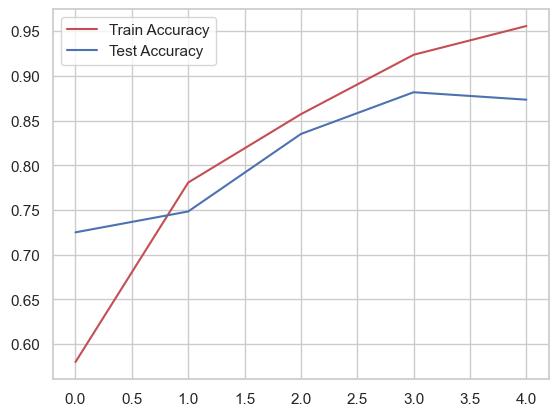

In [115]:
# plot the accuracy plot
plt.plot(his5.history['accuracy'], 'r')
plt.plot(his5.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

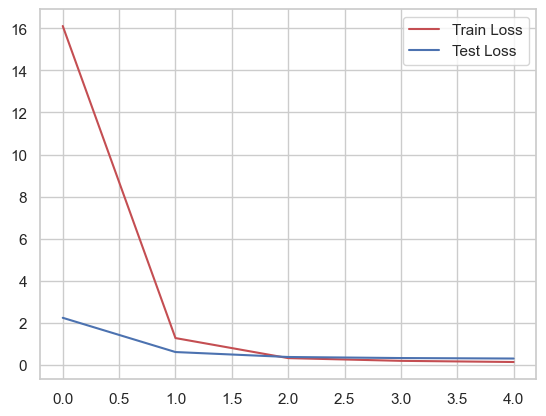

In [116]:
# plot the accuracy plot
plt.plot(his5.history['loss'], 'r')
plt.plot(his5.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [117]:
score_8 = model_5.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score_8[1])

Test accuracy: 0.8733333349227905


19/19 [==============================] - 26s 772ms/step


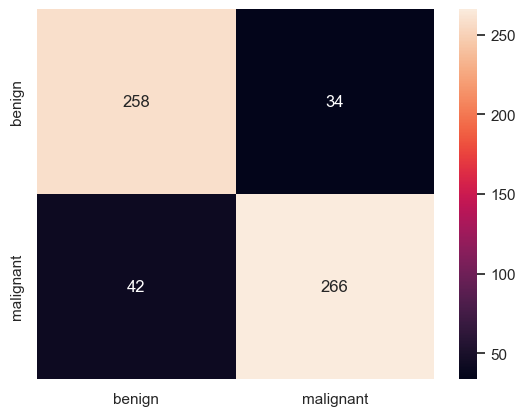

In [118]:
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_5.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [119]:
model_5.save(r'C:\Users\ST-0010\Music\CHANDRU\Breast_Cancer\inception_model.h5')

C:\Users\ST-0010\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [120]:
new = ['inception', score_8[1]]
results.loc[4] = new

In [121]:
results

model  test_accuracy
0        CNN       0.585000
1        VGG       0.906667
2      VGG19       0.835000
3  MobileNet       0.920000
4  inception       0.873333